In [129]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
from sklearn.preprocessing import MinMaxScaler


In [130]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [131]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [132]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [133]:
print("Shape of training data : ",train.shape)
print("Shape of testing data : ",test.shape)

Shape of training data :  (1460, 81)
Shape of testing data :  (1459, 80)


In [134]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [135]:
train.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [136]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [145]:
features_to_change = ['MSSubClass','OverallQual','OverallCond','YearBuilt', 'YearRemodAdd','MoSold', 'YrSold','GarageCars']
int_to_object=['MSSubClass','OverallQual','OverallCond','GarageCars']
for feature in int_to_object:
  train[feature]=train[feature].astype(object)
  test[feature]=test[feature].astype(object)
 

In [16]:
# Drop id column as it is not requierd
train.drop(columns=['Id'],axis=1,inplace=True)
test.drop(columns=['Id'],axis=1,inplace=True)

In [146]:
print(train.isna().sum())
print("Total Values: ",train.isna().sum().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Total Values:  6965


In [152]:
print(test.isna().sum())
print("Total Values: ",test.isna().sum().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64
Total Values:  7000


<AxesSubplot:>

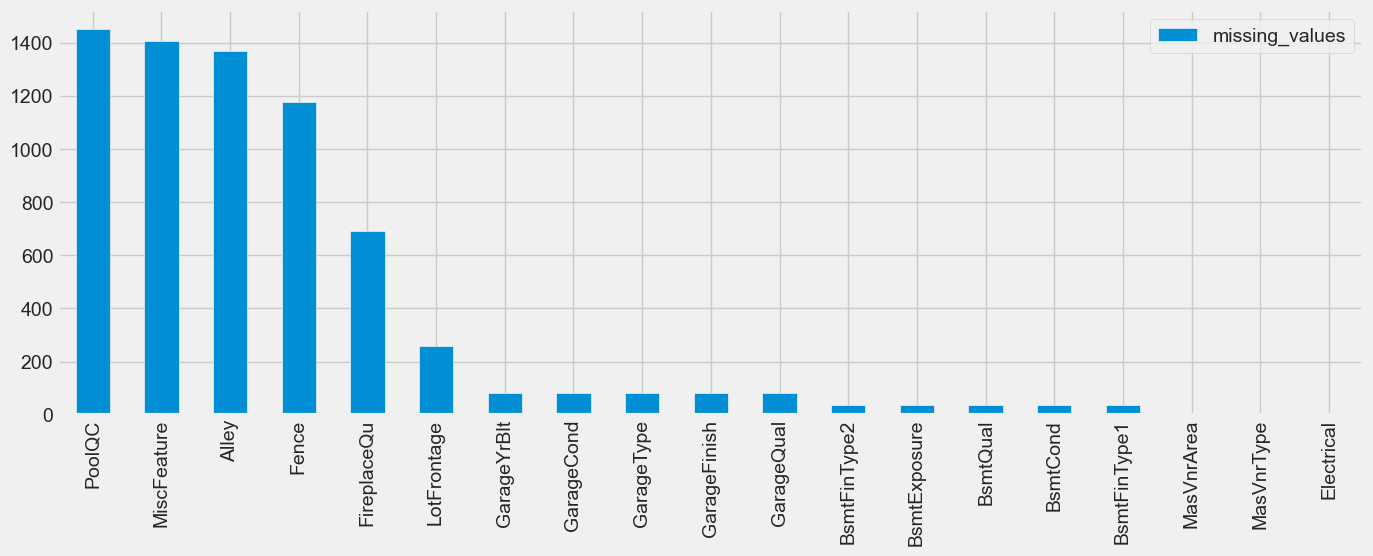

In [167]:
train_df=pd.DataFrame(train.isna().sum().sort_values(ascending=False),columns=['missing_values'])
train_df[train_df['missing_values']>0].plot.bar(figsize=(15,5))

In [168]:
train_df[train_df['missing_values']>0]

,missing_values
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


<AxesSubplot:>

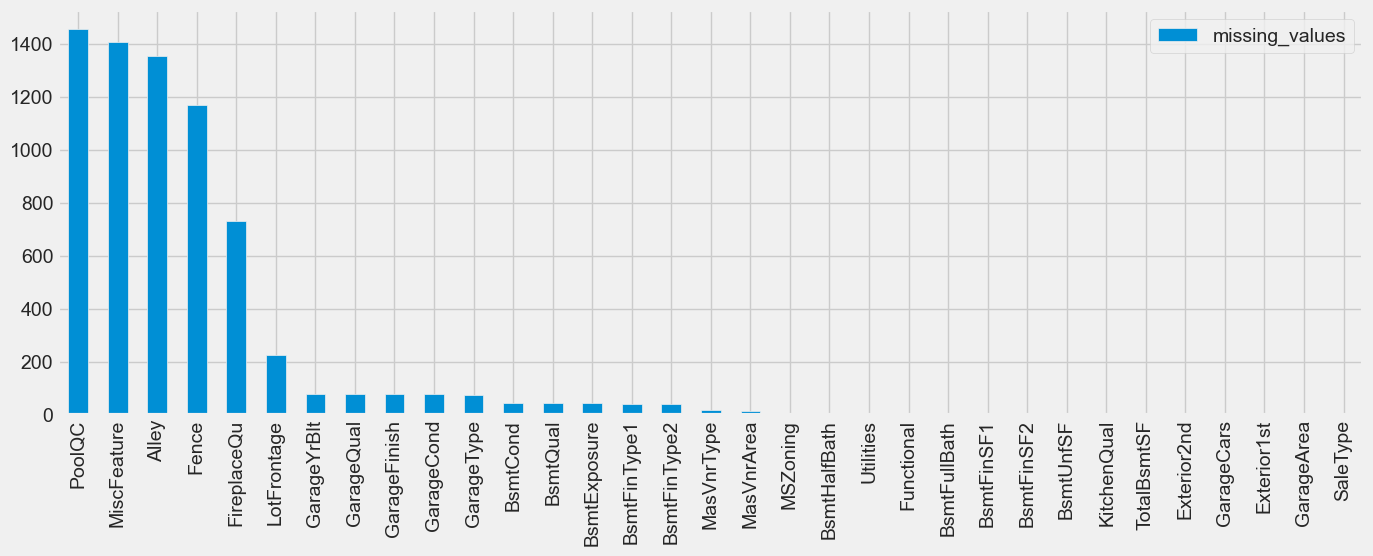

In [169]:
test_df=pd.DataFrame(test.isna().sum().sort_values(ascending=False),columns=['missing_values'])
test_df[test_df['missing_values']>0].plot.bar(figsize=(15,5))

In [171]:
test_df[test_df['missing_values']>0]

,missing_values
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageQual,78
GarageFinish,78
GarageCond,78


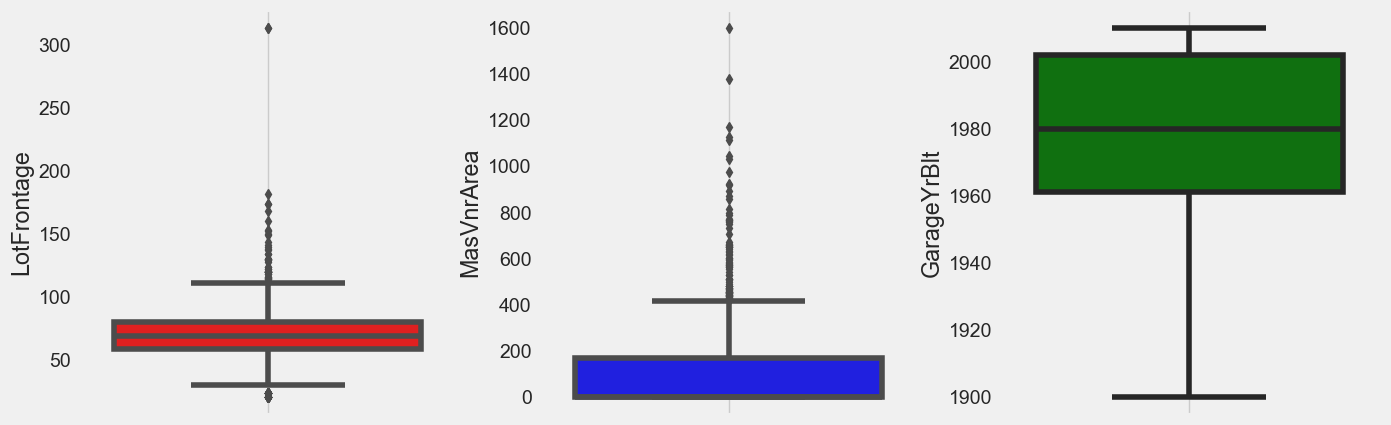

In [28]:
#There's no need of dropping the na values as we have less missing values.
#If there are outliers in these three columns, we can fill them with their median values.
#if not then mean is fine.

plt.figure(figsize=(15,5))
column=['LotFrontage','MasVnrArea','GarageYrBlt']
temp=train[column]
color=['','red','blue','green']
i=1
for col in column:
  plt.subplot(1,3,i)
  sns.boxplot(data=train,y=col,color=color[i])
  i=i+1
  plt.grid()


In [29]:
train['MasVnrArea'].mean(),train['MasVnrArea'].median()

(103.68526170798899, 0.0)

In [30]:
train['GarageYrBlt'].mean(),train['GarageYrBlt'].median()

(1978.5061638868744, 1980.0)

In [31]:
#fill the missing values with median
for col in column:
  train[col].fillna(train[col].median(),inplace=True)
#for test dataset
for col in column:
    test[col].fillna(test[col].median(),inplace=True)

In [173]:
#We can see that there are no missing values present now
print("Missing values in train",train[column].isna().sum())
print("Missing values in test",test[column].isna().sum())

Missing values in train 0
Missing values in test 0


In [34]:
features_to_examine = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish',
 'GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [35]:
train[features_to_examine].isna().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
Electrical         1
dtype: int64

In [183]:
print("PoolQC: \n",train['PoolQC'].value_counts())
print("\n MiscFeature \n",train['MiscFeature'].value_counts())
print("\n Alley \n",train['Alley'].value_counts())
print("\n Fence \n",train['Fence'].value_counts())

PoolQC: 
 Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

 MiscFeature 
 Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

 Alley 
 Grvl    50
Pave    41
Name: Alley, dtype: int64

 Fence 
 MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


In [40]:
#Dropping columns in both train and test datasets.

train.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)
test.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [41]:
train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [42]:
train[train['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


In [187]:
train['FireplaceQu']=train['FireplaceQu'].fillna('NotAvailable')
test['FireplaceQu']=test['FireplaceQu'].fillna('NotAvailable')

In [188]:
#Out of the features to examine , following are left
features_to_examine = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2','Electrical','GarageType','GarageFinish',
 'GarageQual','GarageCond']


In [189]:
train['MasVnrType'].isna().sum()

8

In [44]:
train['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [45]:
train[train['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,0.0
529,NaN,0.0
650,NaN,0.0
936,NaN,0.0
973,NaN,0.0
977,NaN,0.0
1243,NaN,0.0
1278,NaN,0.0


In [46]:
train['MasVnrType'].mode()

0    None
Name: MasVnrType, dtype: object

In [47]:
train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64

In [185]:
train[train['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0,0,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [49]:
train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2']].mode()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,TA,TA,No,Unf,Unf


In [50]:
train['Electrical'].isna().sum()

1

In [51]:
train['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [52]:
train[['GarageType','GarageFinish','GarageQual','GarageCond']].isna().sum()

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [53]:
train[train['GarageType'].isnull()][['GarageType', 'GarageYrBlt', 'GarageFinish','GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,1980.0,NaN,0,0,NaN,NaN
48,NaN,1980.0,NaN,0,0,NaN,NaN
78,NaN,1980.0,NaN,0,0,NaN,NaN
88,NaN,1980.0,NaN,0,0,NaN,NaN
89,NaN,1980.0,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,1980.0,NaN,0,0,NaN,NaN
1407,NaN,1980.0,NaN,0,0,NaN,NaN
1449,NaN,1980.0,NaN,0,0,NaN,NaN
1450,NaN,1980.0,NaN,0,0,NaN,NaN


In [54]:
train[['GarageType','GarageFinish',
 'GarageQual','GarageCond']].mode()

,GarageType,GarageFinish,GarageQual,GarageCond
0,Attchd,Unf,TA,TA


In [55]:
#We are done with all the categorical features
train['MasVnrType'].fillna('None',inplace=True)
fill_with_No_Bsmt = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
fill_with_No_Grg = ['GarageType','GarageFinish','GarageQual','GarageCond']
for col in fill_with_No_Bsmt:
    train[col].fillna('No_Bsmt',inplace=True)
    test[col].fillna('No_Bsmt',inplace=True)

for col in fill_with_No_Grg:
    train[col].fillna('No_Grg',inplace=True)
    test[col].fillna('No_Grg',inplace=True)

train['Electrical'].fillna('SBrkr',inplace=True)
test['Electrical'].fillna('SBrkr',inplace=True)

In [197]:
#Let's check if there any missing values left in train dataset first

train_df.isna().sum().sum()


missing_values    0
dtype: int64

In [195]:
#Let's check for test dataset

test.isna().sum().sum()

6270

In [199]:
test_df=pd.DataFrame(test.isna().sum().sort_values(ascending=False),columns=['missing_values'])
test_df=test_df[test_df['missing_values']>0]

In [200]:
features_to_examine=test_df.index.tolist()

In [61]:
test[features_to_examine].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FireplaceQu   729 non-null    object 
 1   MasVnrType    1443 non-null   object 
 2   MSZoning      1455 non-null   object 
 3   Functional    1457 non-null   object 
 4   BsmtFullBath  1457 non-null   float64
 5   BsmtHalfBath  1457 non-null   float64
 6   Utilities     1457 non-null   object 
 7   Exterior2nd   1458 non-null   object 
 8   KitchenQual   1458 non-null   object 
 9   GarageCars    1458 non-null   object 
 10  GarageArea    1458 non-null   float64
 11  Exterior1st   1458 non-null   object 
 12  BsmtFinSF2    1458 non-null   float64
 13  BsmtUnfSF     1458 non-null   float64
 14  TotalBsmtSF   1458 non-null   float64
 15  SaleType      1458 non-null   object 
 16  BsmtFinSF1    1458 non-null   float64
dtypes: float64(7), object(10)
memory usage: 193.9+ KB


In [62]:
# We fill all the categorical features with mode and numerical features with mean
cat = [col for col in features_to_examine if test[col].dtype=='O']

for feature in cat:
    test[feature] = test[feature].fillna(test[feature].mode()[0])

num = [col for col in features_to_examine if test[col].dtype!='O']

for feature in num:
    test[feature] = test[feature].fillna(test[feature].median())

In [63]:
test.isna().sum().sum()

0

In [64]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [201]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=train['SalePrice']),row=1,col=1)
fig.add_trace(go.Box(y=train['SalePrice'],boxpoints='all',line_color='orange'),row=1,col=2)
fig.update_layout(height=500, showlegend=False,title_text="Sale Price Distribution and Box Plot")

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

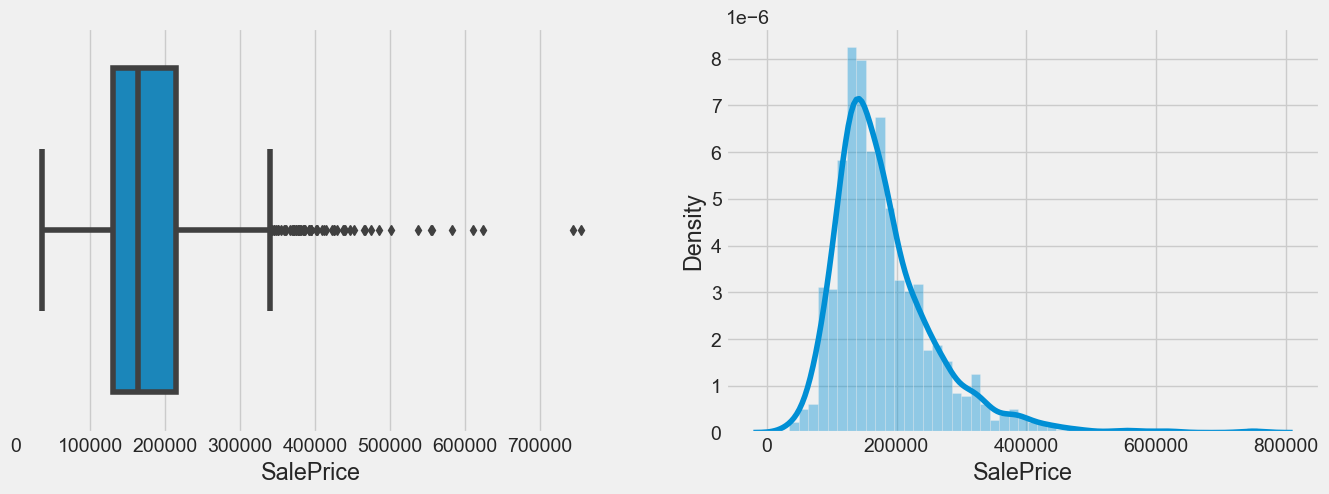

In [209]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(train['SalePrice'])
plt.subplot(1,2,2)
sns.distplot(train['SalePrice'])

In [67]:
discrete=[]
for col in train.columns:
  if train[col].dtype=='int64' and len(train[col].unique())<=15:
    discrete.append(col)
discrete

['BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'PoolArea',
 'MoSold',
 'YrSold']

In [68]:
for col in discrete:
  print('{} has {} unique values . '.format(col,train[col].unique()))

BsmtFullBath has [1 0 2 3] unique values . 
BsmtHalfBath has [0 1 2] unique values . 
FullBath has [2 1 3 0] unique values . 
HalfBath has [1 0 2] unique values . 
BedroomAbvGr has [3 4 1 2 0 5 6 8] unique values . 
KitchenAbvGr has [1 2 3 0] unique values . 
TotRmsAbvGrd has [ 8  6  7  9  5 11  4 10 12  3  2 14] unique values . 
Fireplaces has [0 1 2 3] unique values . 
PoolArea has [  0 512 648 576 555 480 519 738] unique values . 
MoSold has [ 2  5  9 12 10  8 11  4  1  7  3  6] unique values . 
YrSold has [2008 2007 2006 2009 2010] unique values . 


Text(0.5, 0.98, 'Discrete Numerical Analysis')

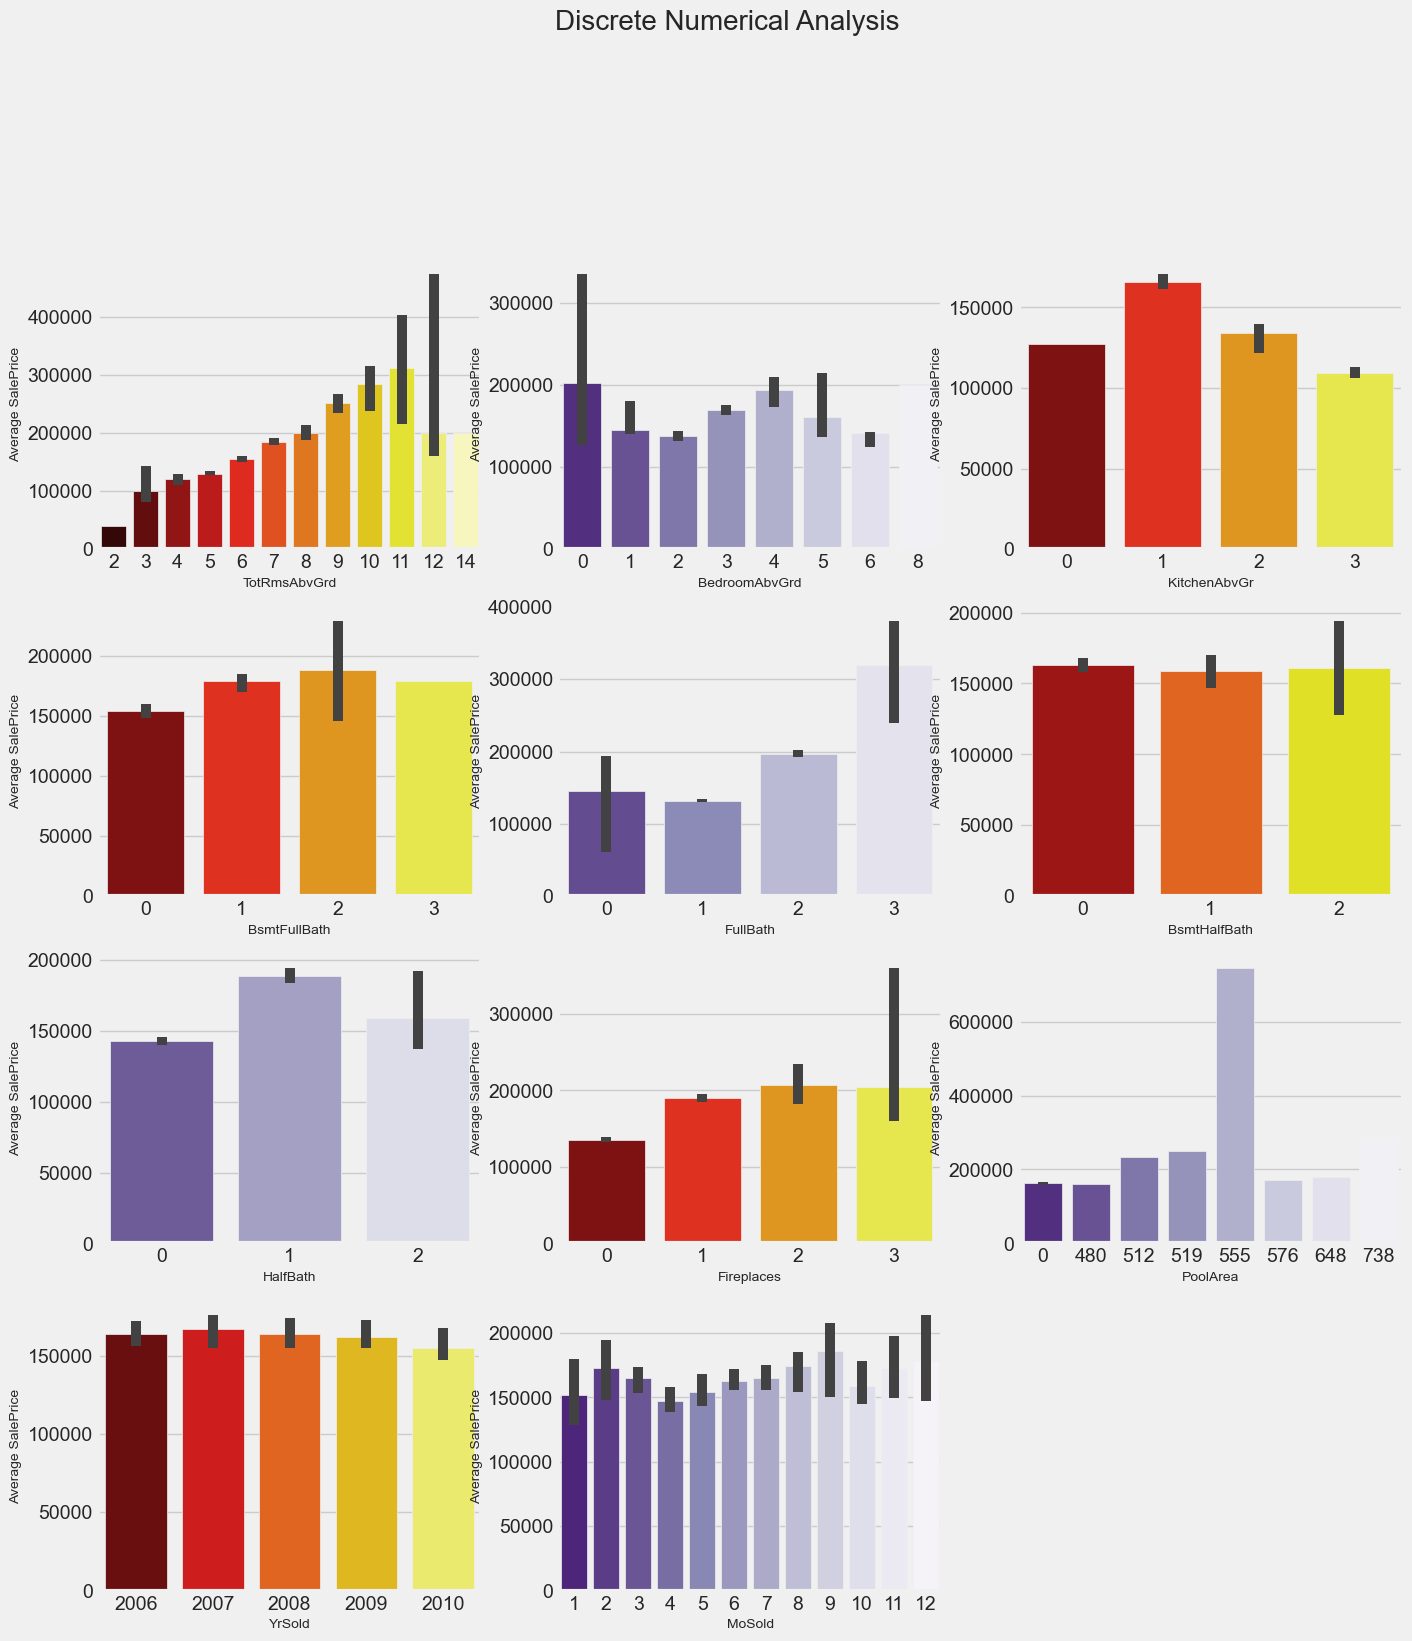

In [210]:
plt.figure(figsize=(15,25))
plt.subplot(6,3,1)
sns.barplot(data=train,x='TotRmsAbvGrd',estimator=np.median,y='SalePrice',palette='hot')
plt.xlabel("TotRmsAbvGrd",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,2)
sns.barplot(data=train,x='BedroomAbvGr',estimator=np.median,y='SalePrice',palette='Purples_r')
plt.xlabel("BedroomAbvGrd",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,3)
sns.barplot(data=train,x='KitchenAbvGr',estimator=np.median,y='SalePrice',palette='hot')
plt.xlabel("KitchenAbvGr",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,4)
sns.barplot(data=train,x='BsmtFullBath',estimator=np.median,y='SalePrice',palette='hot')
plt.xlabel("BsmtFullBath",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,5)
sns.barplot(data=train,x='FullBath',estimator=np.median,y='SalePrice',palette='Purples_r')
plt.xlabel("FullBath",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,6)
sns.barplot(data=train,x='BsmtHalfBath',estimator=np.median,y='SalePrice',palette='hot')
plt.xlabel("BsmtHalfBath",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,7)
sns.barplot(data=train,x='HalfBath',estimator=np.median,y='SalePrice',palette='Purples_r')
plt.xlabel("HalfBath",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,8)
sns.barplot(data=train,x='Fireplaces',estimator=np.median,y='SalePrice',palette='hot')
plt.xlabel("Fireplaces",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,9)
sns.barplot(data=train,x='PoolArea',estimator=np.median,y='SalePrice',palette='Purples_r')
plt.xlabel("PoolArea",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,10)
sns.barplot(data=train,x='YrSold',estimator=np.median,y='SalePrice',palette='hot')
plt.xlabel("YrSold",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,11)
sns.barplot(data=train,x='MoSold',estimator=np.median,y='SalePrice',palette='Purples_r')
plt.xlabel("MoSold",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.suptitle("Discrete Numerical Analysis",fontsize=20)

In [70]:
#Here we create a list of all the numerical features in our dataset.
#And we have already separated the discrete features.
#But we separate year features , as we will study them late
num=[]
for col in train.columns:
   if train[col].dtype=='int64' and col not in ['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt'] and col not in discrete:
        num.append(col)

In [71]:
print("Numerical Features :: \n\n{}".format(num))

Numerical Features :: 

['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


<AxesSubplot:>

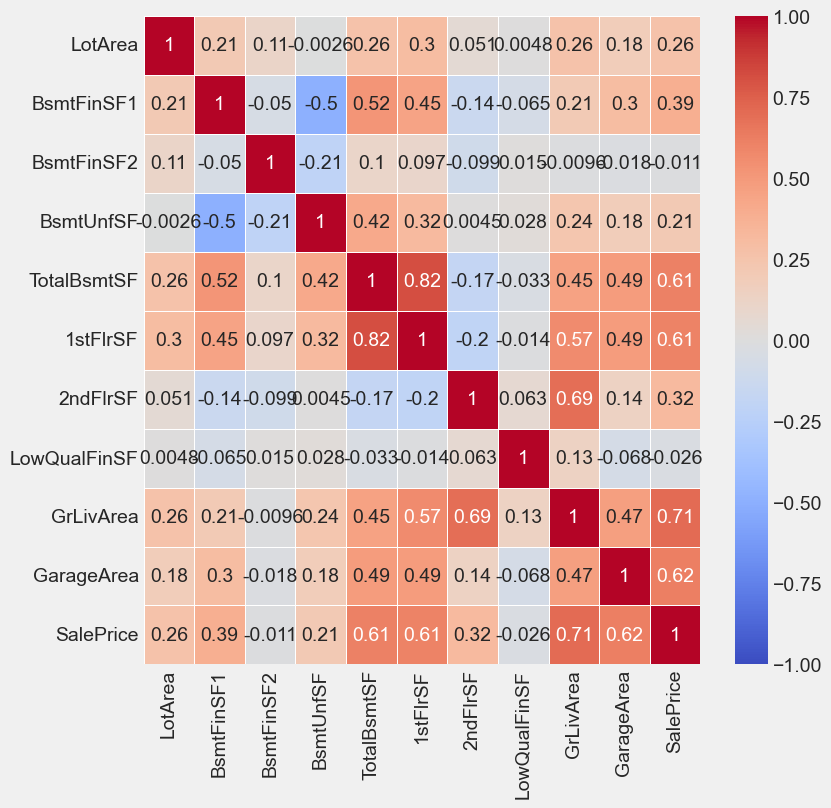

In [78]:
#first ten features
df_corr=train[num].iloc[:,0:10]
df_corr['SalePrice']=train['SalePrice']
corr=df_corr.corr()
fig = plt.figure(figsize=(8,8))
'''
#Here we use cmap CoolWarm as it gives us a better view of postive and negative correlation.
#And with the help of vmin and vmax set to -1 and +1 ,
the features having values closer to +1 have positive correlation and features having values closer to -1 have negative correlation.
'''
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0)

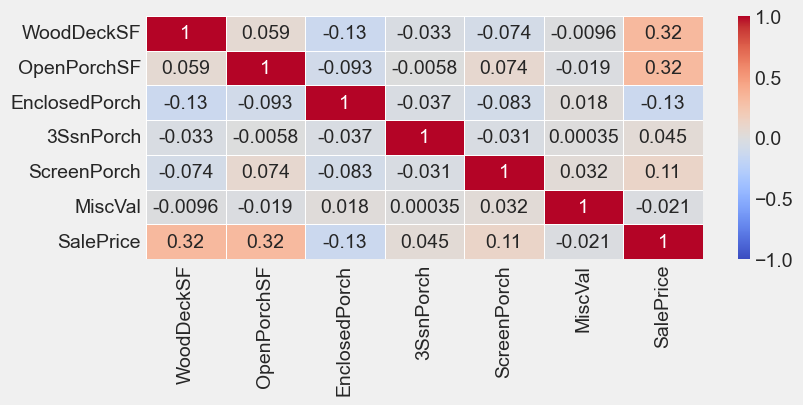

In [82]:
df_corr = train[num].iloc[:,10:]
df_corr['SalePrice'] = train['SalePrice']
corr = df_corr.corr()

fig = plt.figure(figsize=(8,3))
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


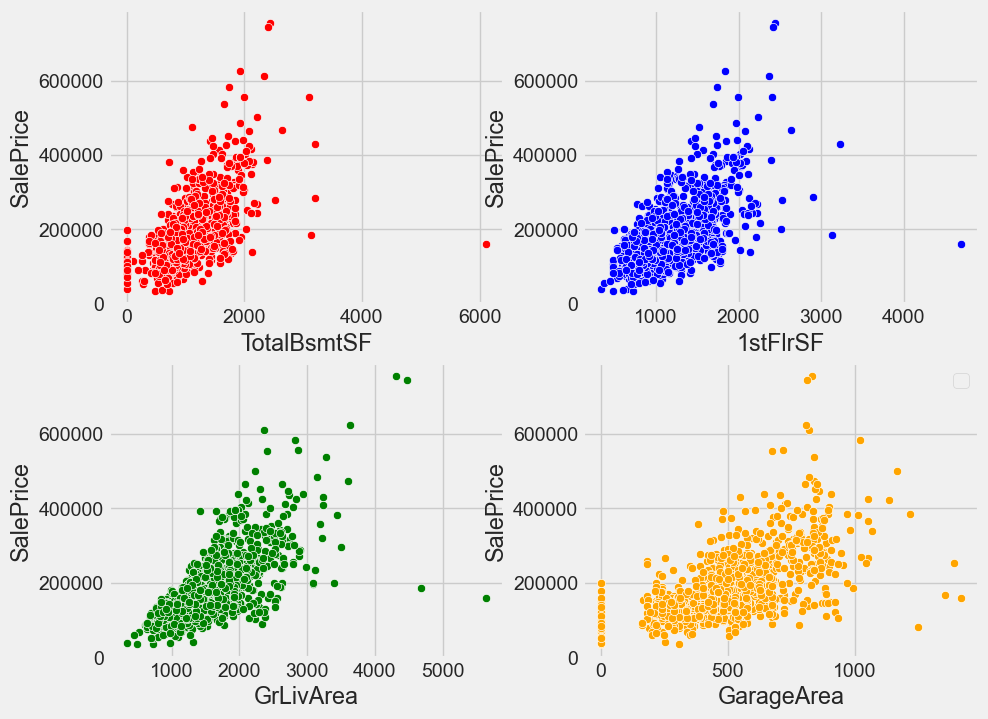

In [83]:
## Scatterplots
plt.figure(figsize=(10,8))
features_to_examine = ['TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']
plt.subplot(2,2,1)
sns.scatterplot(data=train,x='TotalBsmtSF',y='SalePrice',color='red')
plt.subplot(2,2,2)
sns.scatterplot(data=train,x='1stFlrSF',y='SalePrice',color='blue')
plt.subplot(2,2,3)
sns.scatterplot(data=train,x='GrLivArea',y='SalePrice',color='green')
plt.subplot(2,2,4)
sns.scatterplot(data=train,x='GarageArea',y='SalePrice',color='orange')
plt.legend()

In [84]:
cat=[]
for col in train.columns:
    if train[col].dtype=='object':
        cat.append(col)

#printing the list
print("Categorical variables :: \n\n{}".format(cat))

Categorical variables :: 

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [85]:
cat1 = ['MSSubClass']
#Converting integer values of MSSubClass to their respective categorical values given in description.
#Create a copy of the dataset and replace all numeric values with their respective categories.
df_new=train.copy()
df_new['MSSubClass'] = df_new['MSSubClass'].replace({20:'1_STORY_NEWER',
                                                    30:'1_STORY_OLDER',40:'1_STORY_ATTIC',
                                                    45:'1_1/2_UNFINISHED',
                                                    50:'1_1/2_FINISHED',60:'2_STORY_NEWER',
                                                    70:'2_STORY_OLDER',75:'2_1/2_STOPY',
                                                    80:'SPLIT/MULTILEVEL',85:'SPLIT_FOYER',
                                                    90:'DUPLEX',120:'1_STORY_PUD',
                                                    150:'1_1/2_STORY_PUD',
                                                    160:'2_STORY_PUD',
                                                    180:'PUD_MULTILEVEL',
                                                    190:'2_FAMILY_CONVERSION'})
#Covert to object
df_new['MSSubClass'] = df_new['MSSubClass'].astype(object)

In [86]:
#This table tells us the count of the above feature in the dataset and calculates average Sale price.
table=df_new.groupby(['MSSubClass'])['MSSubClass','SalePrice'].agg({"MSSubClass" : 'count','SalePrice': 'median' }).sort_values(by ='SalePrice', ascending=False)
table.style.background_gradient(cmap="Reds")

C:\Users\Dell\AppData\Local\Temp\ipykernel_2876\124308982.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,MSSubClass,SalePrice
MSSubClass,,
2_STORY_NEWER,299,215200.000000
1_STORY_PUD,87,192000.000000
SPLIT/MULTILEVEL,58,166500.000000
2_1/2_STOPY,16,163500.000000
1_STORY_NEWER,536,159250.000000
2_STORY_OLDER,60,156000.000000
2_STORY_PUD,63,146000.000000
1_STORY_ATTIC,4,142500.000000
SPLIT_FOYER,20,140750.000000


c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Dell\AppData\Local\Temp\ipykernel_2876\4183410282.py:17: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eithe

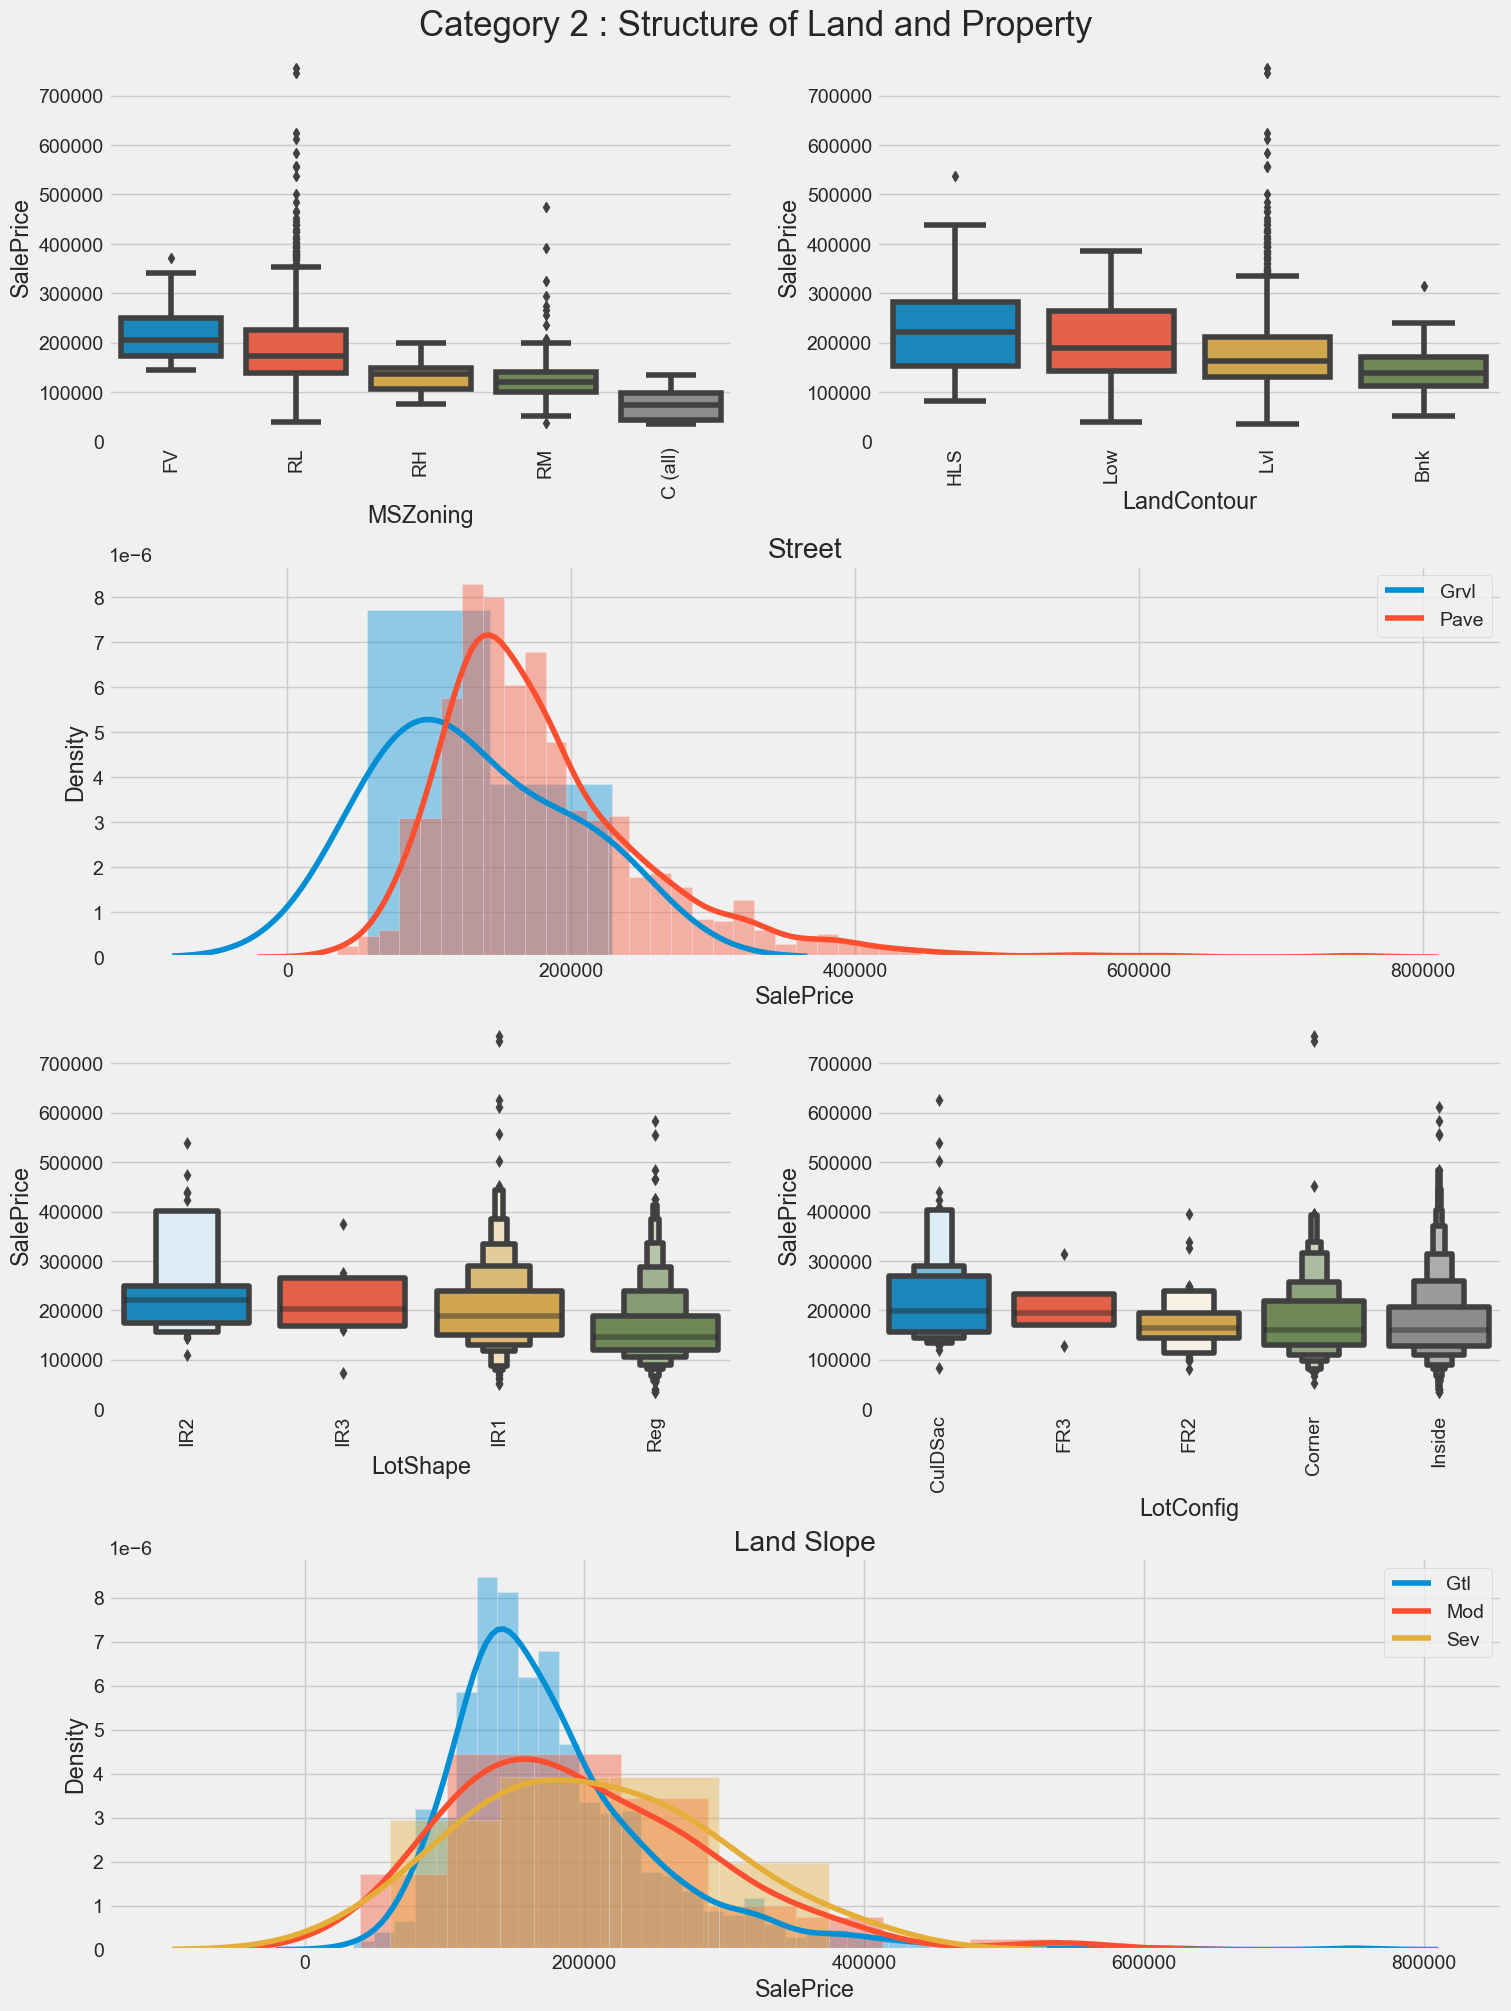

In [87]:
cat2=['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope']
fig=plt.figure(constrained_layout=True,figsize=(15,20))
gs=gridspec.GridSpec(4,2,figure=fig)
plt.subplot(gs[0,0])
table = train.groupby(['MSZoning'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=train,x='MSZoning',y="SalePrice",order=table['MSZoning'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[0,1])
table = train.groupby(['LandContour'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=train,x='LandContour',y="SalePrice",order=table['LandContour'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:])
a1 = sns.distplot(train[train['Street']=='Grvl']['SalePrice'])
a1 = sns.distplot(train[train['Street']=='Pave']['SalePrice'])
plt.legend('upper right' , labels = ['Grvl','Pave'])
plt.xlabel("SalePrice")
plt.title("Street")

plt.subplot(gs[2,0])
table = train.groupby(['LotShape'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=train,x='LotShape',y="SalePrice",order=table['LotShape'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,1])
table = train.groupby(['LotConfig'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=train,x='LotConfig',y="SalePrice",order=table['LotConfig'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[3,:])
a1 = sns.distplot(train[train['LandSlope']=='Gtl']['SalePrice'])
a1 = sns.distplot(train[train['LandSlope']=='Mod']['SalePrice'])
a1 = sns.distplot(train[train['LandSlope']=='Sev']['SalePrice'])
plt.legend('upper right' , labels = ['Gtl','Mod','Sev'])
plt.xlabel("SalePrice")
plt.title("Land Slope")

fig.suptitle("Category 2 : Structure of Land and Property",fontsize=25);

In [212]:
cat2=['OverallQual','OverallCond']
df_new['OverallQual'] = df_new['OverallQual'].replace({10:'Very Exc',9:'Exc',8:'VG',7:'Good',
                                                      6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',
                                                      2:'Poor',1:'Very Poor'})

#Covert to object
df_new['OverallQual'] = df_new['OverallQual'].astype(object)

df_new['OverallCond'] = df_new['OverallCond'].replace({10:'Very Exc',9:'Exc',8:'VG',7:'Good',
                                                      6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',
                                                      2:'Poor',1:'Very Poor'})

#Covert to object
df_new['OverallCond'] = df_new['OverallCond'].astype(object)

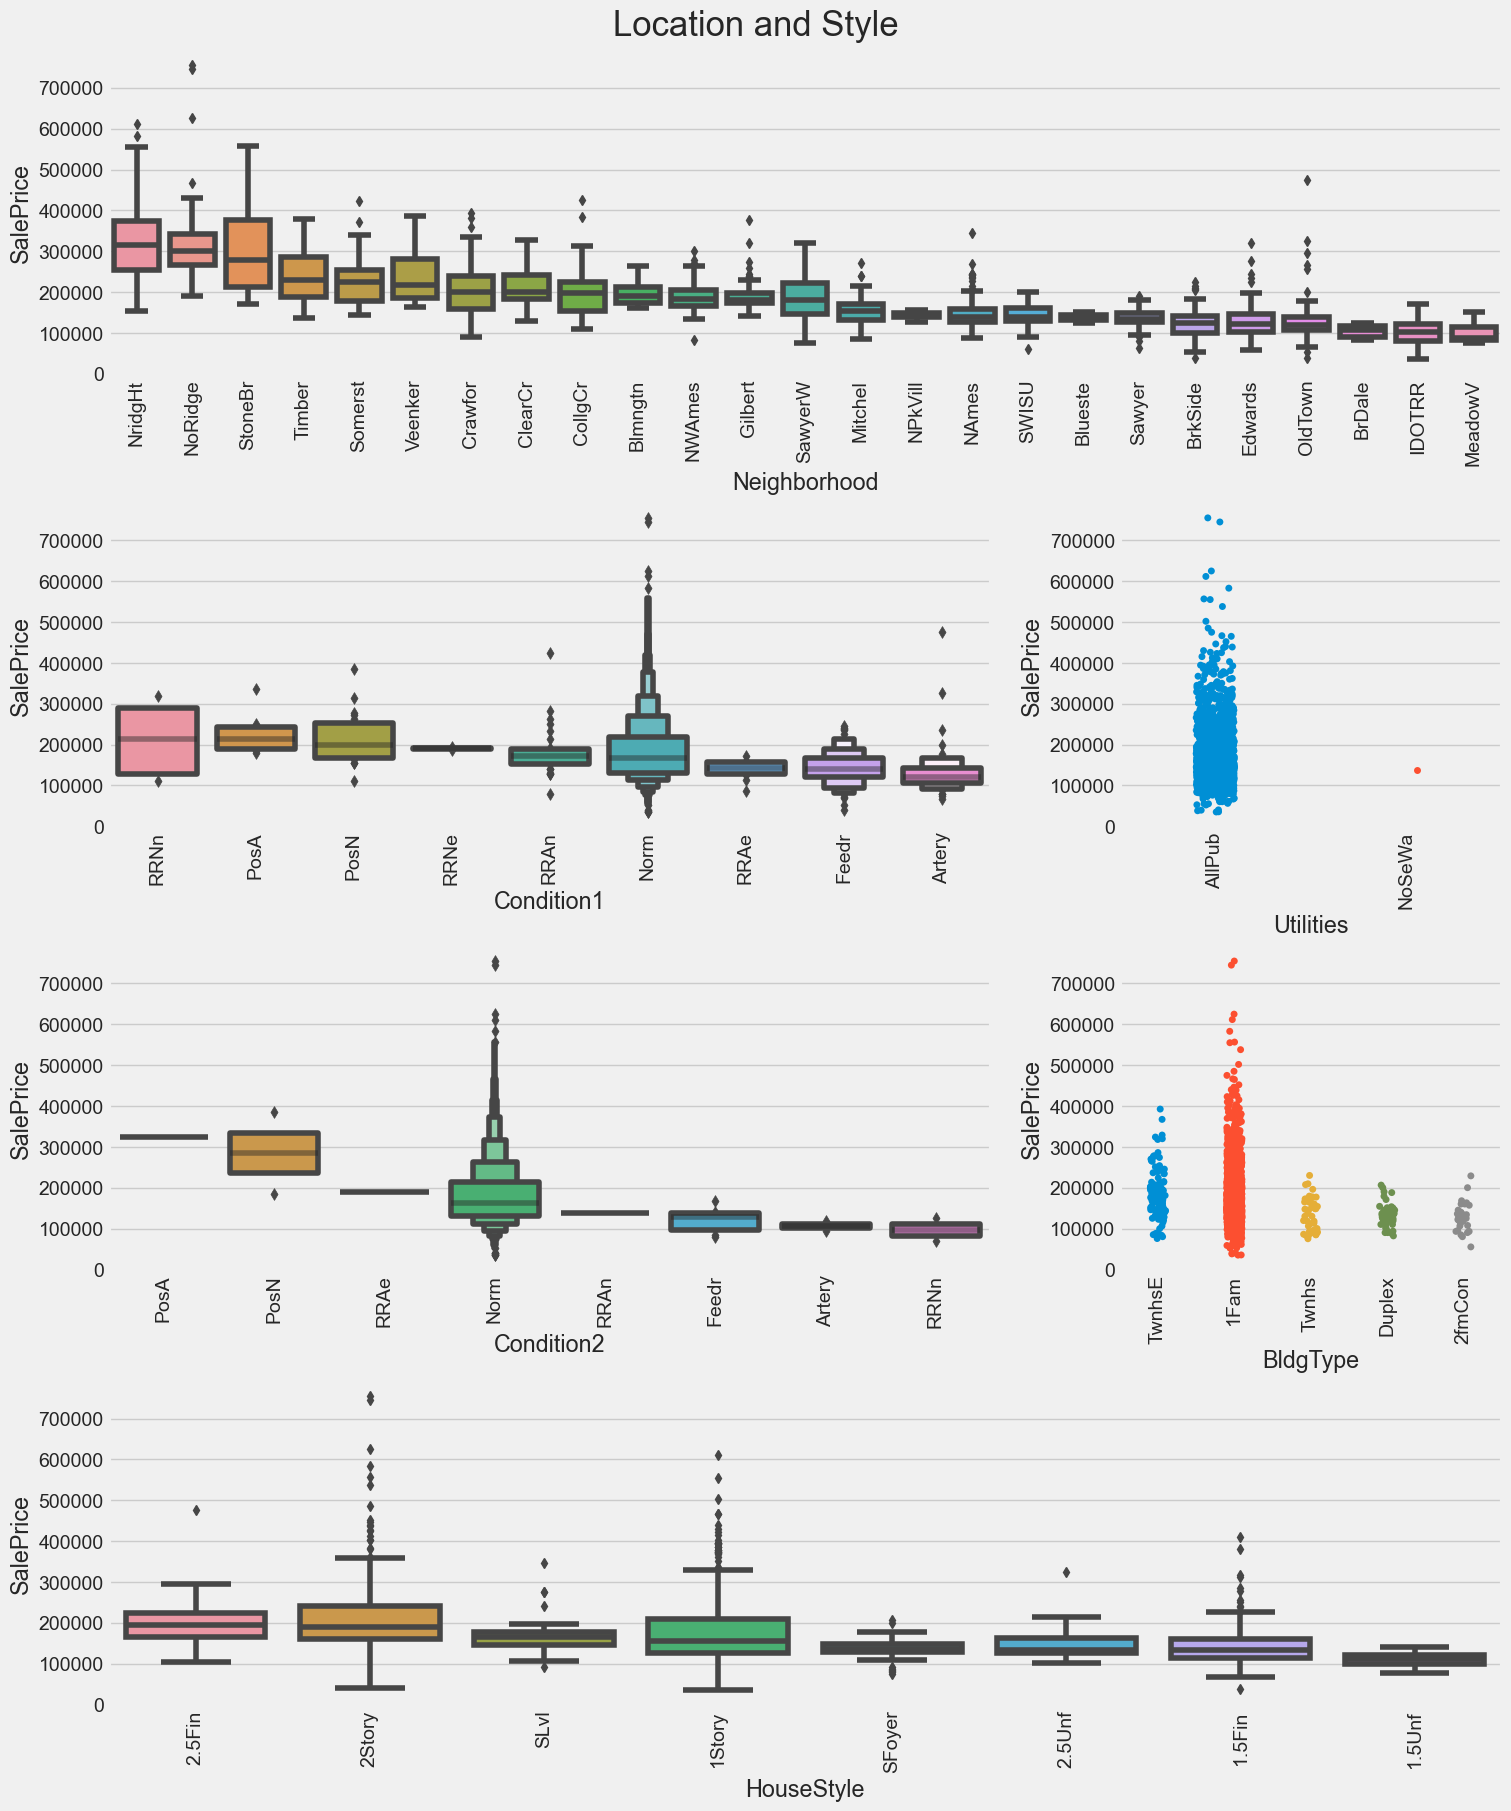

In [213]:
fig = plt.figure(constrained_layout=True,figsize=(15,18))
gs = GridSpec(4, 3, figure=fig)

plt.subplot(gs[0,:])
table = train.groupby(['Neighborhood'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=train,x='Neighborhood',y="SalePrice",order=table['Neighborhood'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:-1])
table = train.groupby(['Condition1'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=train,x='Condition1',y="SalePrice",order=table['Condition1'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,-1])
table = train.groupby(['Utilities'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=train,x='Utilities',y="SalePrice",order=table['Utilities'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,:-1])
table = train.groupby(['Condition2'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=train,x='Condition2',y="SalePrice",order=table['Condition2'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,-1])
table = train.groupby(['BldgType'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=train,x='BldgType',y="SalePrice",order=table['BldgType'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[3,:])
table = train.groupby(['HouseStyle'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=train,x='HouseStyle',y="SalePrice",order=table['HouseStyle'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Location and Style",fontsize=25);

In [214]:
table = df_new.groupby(['Neighborhood'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Reds')

,Neighborhood,SalePrice
16,NridgHt,315000.000000
15,NoRidge,301500.000000
22,StoneBr,278000.000000
23,Timber,228475.000000
21,Somerst,225500.000000
24,Veenker,218000.000000
6,Crawfor,200624.000000
4,ClearCr,200250.000000
5,CollgCr,197200.000000
0,Blmngtn,191000.000000


In [91]:
df=train.copy()

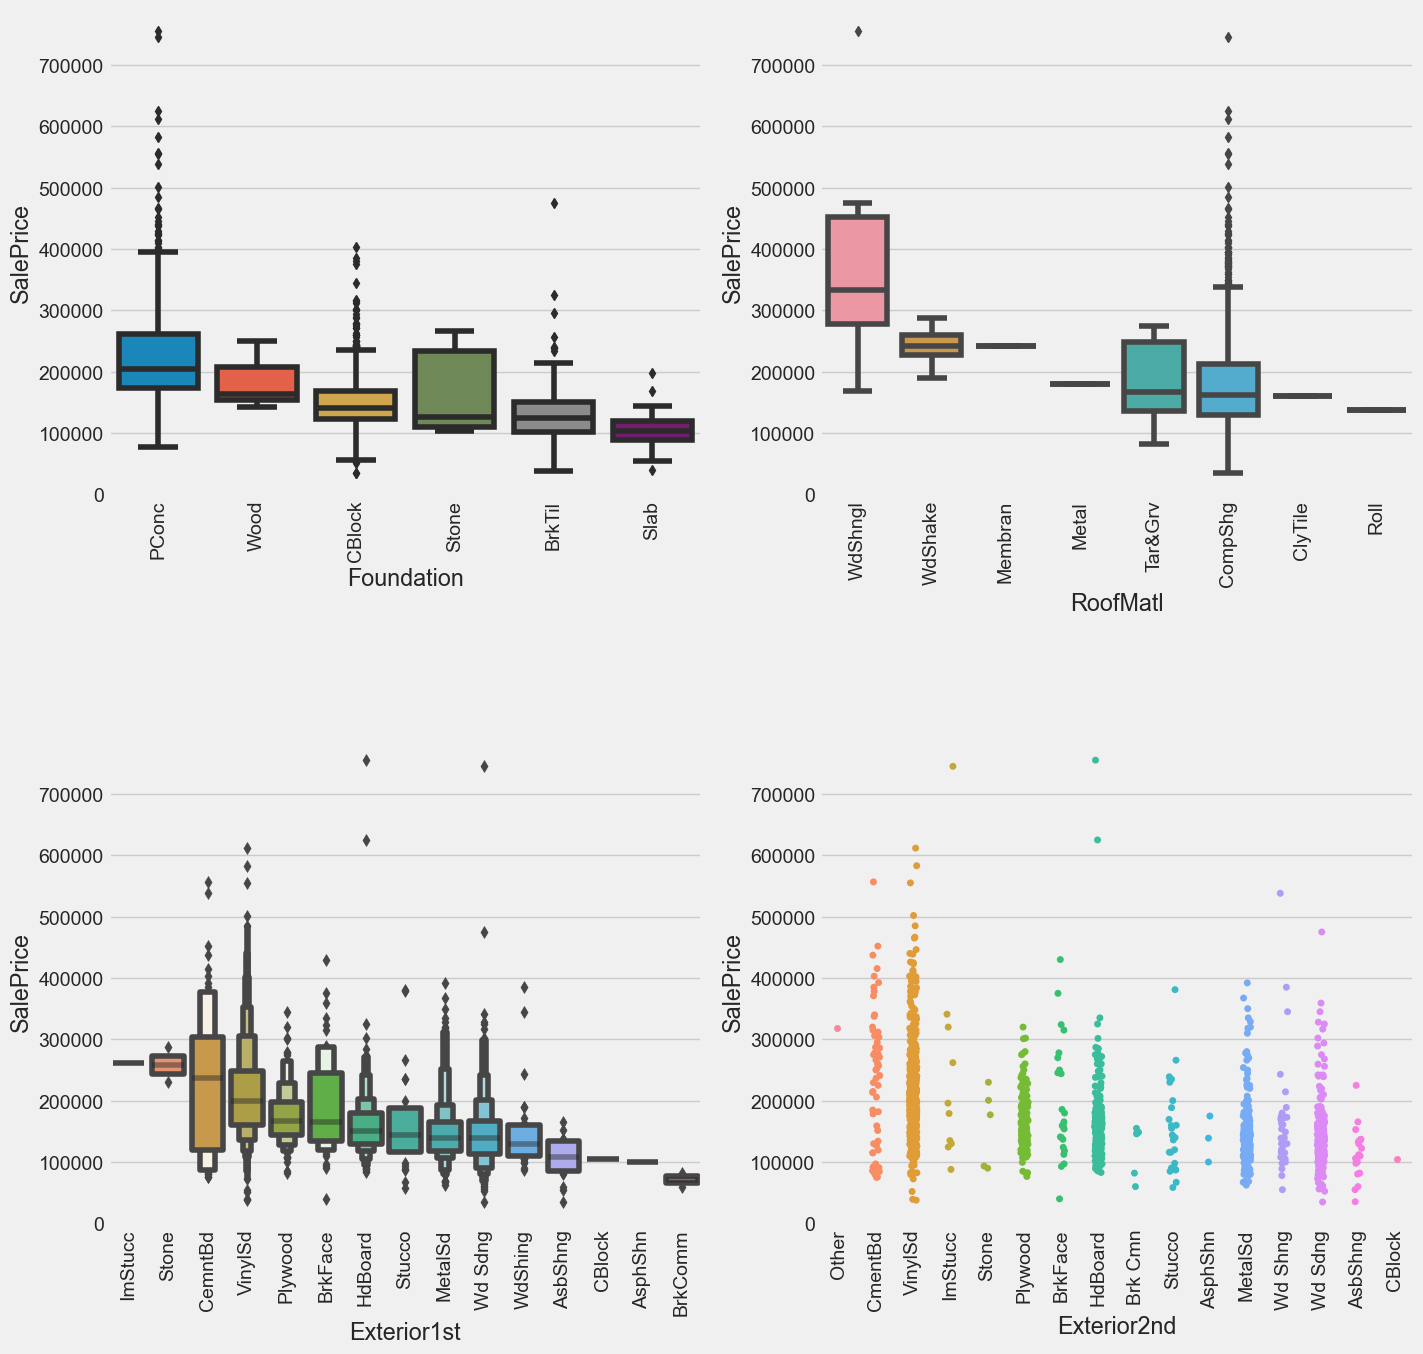

In [92]:
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,2,1)
table = df.groupby(['Foundation'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='Foundation',y="SalePrice",order=table['Foundation'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,2)
table = df.groupby(['RoofMatl'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='RoofMatl',y="SalePrice",order=table['RoofMatl'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,3)
table = df.groupby(['Exterior1st'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='Exterior1st',y="SalePrice",order=table['Exterior1st'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,4)
table = df.groupby(['Exterior2nd'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=df,x='Exterior2nd',y="SalePrice",order=table['Exterior2nd'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig = px.histogram(df, x="SalePrice", color='RoofStyle',barmode="overlay",title='RoofStyle')
fig.update_layout(height=400)
fig.show()

fig = px.histogram(df, x="SalePrice", color='MasVnrType',barmode="overlay",title="Mason Veneer Type")
fig.update_layout(height=400)
fig.show()

In [93]:
table = df_new.groupby(['RoofStyle'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Reds')

,RoofStyle,SalePrice
5,Shed,225000.000000
0,Flat,185000.000000
3,Hip,176500.000000
4,Mansard,175000.000000
1,Gable,160000.000000
2,Gambrel,139000.000000


In [94]:
table = df_new.groupby(['MasVnrType'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Greys')

,MasVnrType,SalePrice
3,Stone,246839.000000
1,BrkFace,181000.000000
2,None,143125.000000
0,BrkCmn,139000.000000


In [95]:
fig = px.histogram(df, x="SalePrice", color='ExterQual',barmode="overlay",title='Exterior Quality')
fig.update_layout(height=400)
fig.show()

fig = px.histogram(df, x="SalePrice", color='ExterCond',barmode="overlay",title="Exterior Condition")
fig.update_layout(height=400)
fig.show()

In [96]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box(y=df['SalePrice'],x=df['BsmtQual'],name='Basement Quality'),row=1,col=1)
fig.add_trace(go.Box(y=df['SalePrice'],x=df['BsmtExposure'],name='Basement Exposure'),row=1,col=2)
fig.update_layout( title_text="Basement Quality and Exposure",height=400)
fig.show()

fig = px.histogram(df, x="SalePrice", color='BsmtCond',barmode="overlay",height=400,title='Basement Condition')
fig.show()

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Violin(y=df['SalePrice'],x=df['BsmtFinType1'],name='Basement_Finish Type1 '),row=1,col=1)
fig.add_trace(go.Violin(y=df['SalePrice'],x=df['BsmtFinType2'],name='Basement_Finish Type2'),row=1,col=2)
fig.update_layout( title_text="Basement Finish Type 1 and 2",height=400)
fig.show()

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Dell\AppData\Local\Temp\ipykernel_2876\2591015743.py:15: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



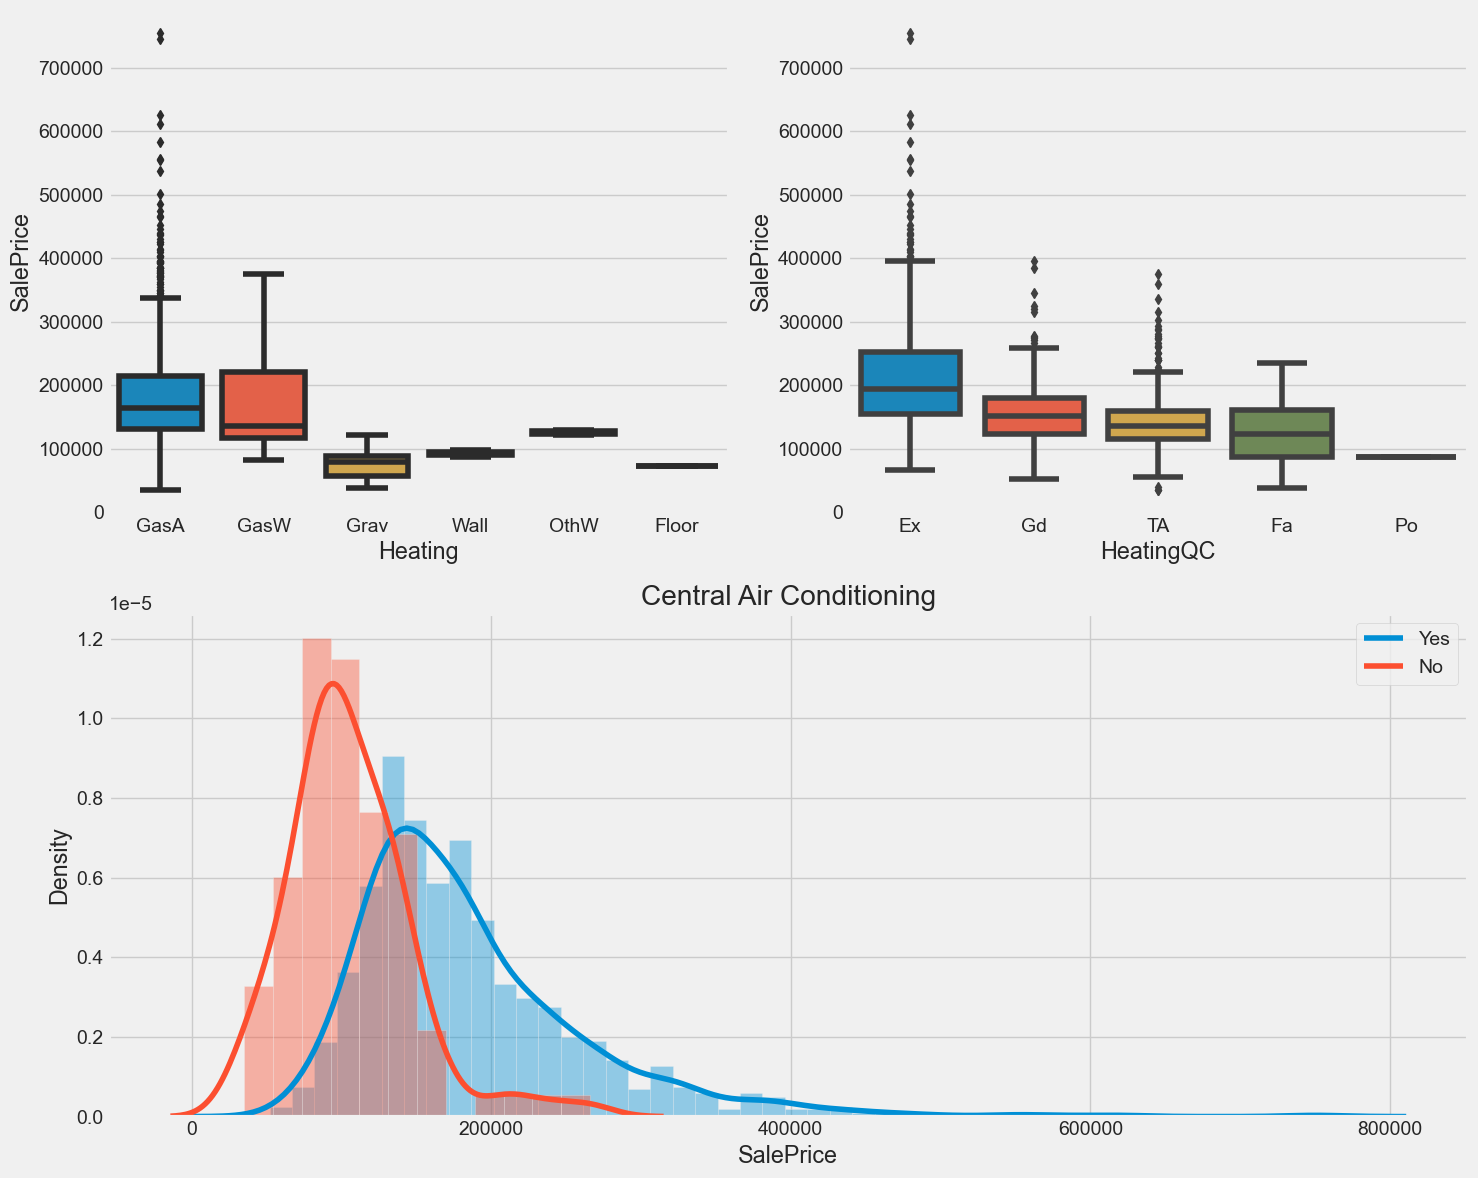

In [97]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True,figsize=(15,12))
gs = gridspec.GridSpec(2, 2)

plt.subplot(gs[0,0])
ax1 = sns.boxplot(data=df,x="Heating",y="SalePrice")

plt.subplot(gs[0,1])
ax1 = sns.boxplot(data=df,x="HeatingQC",y="SalePrice")

plt.subplot(gs[1,:])
sns.distplot(df[df['CentralAir']=='Y']['SalePrice'])
sns.distplot(df[df['CentralAir']=='N']['SalePrice'])
plt.legend('upper right' , labels = ['Yes','No'])
plt.xlabel("SalePrice")
plt.title("Central Air Conditioning")

px.histogram(df, x="SalePrice", color='Electrical',barmode="overlay",title="Electrical System")


c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\Dell\anaconda3\lib\site-package

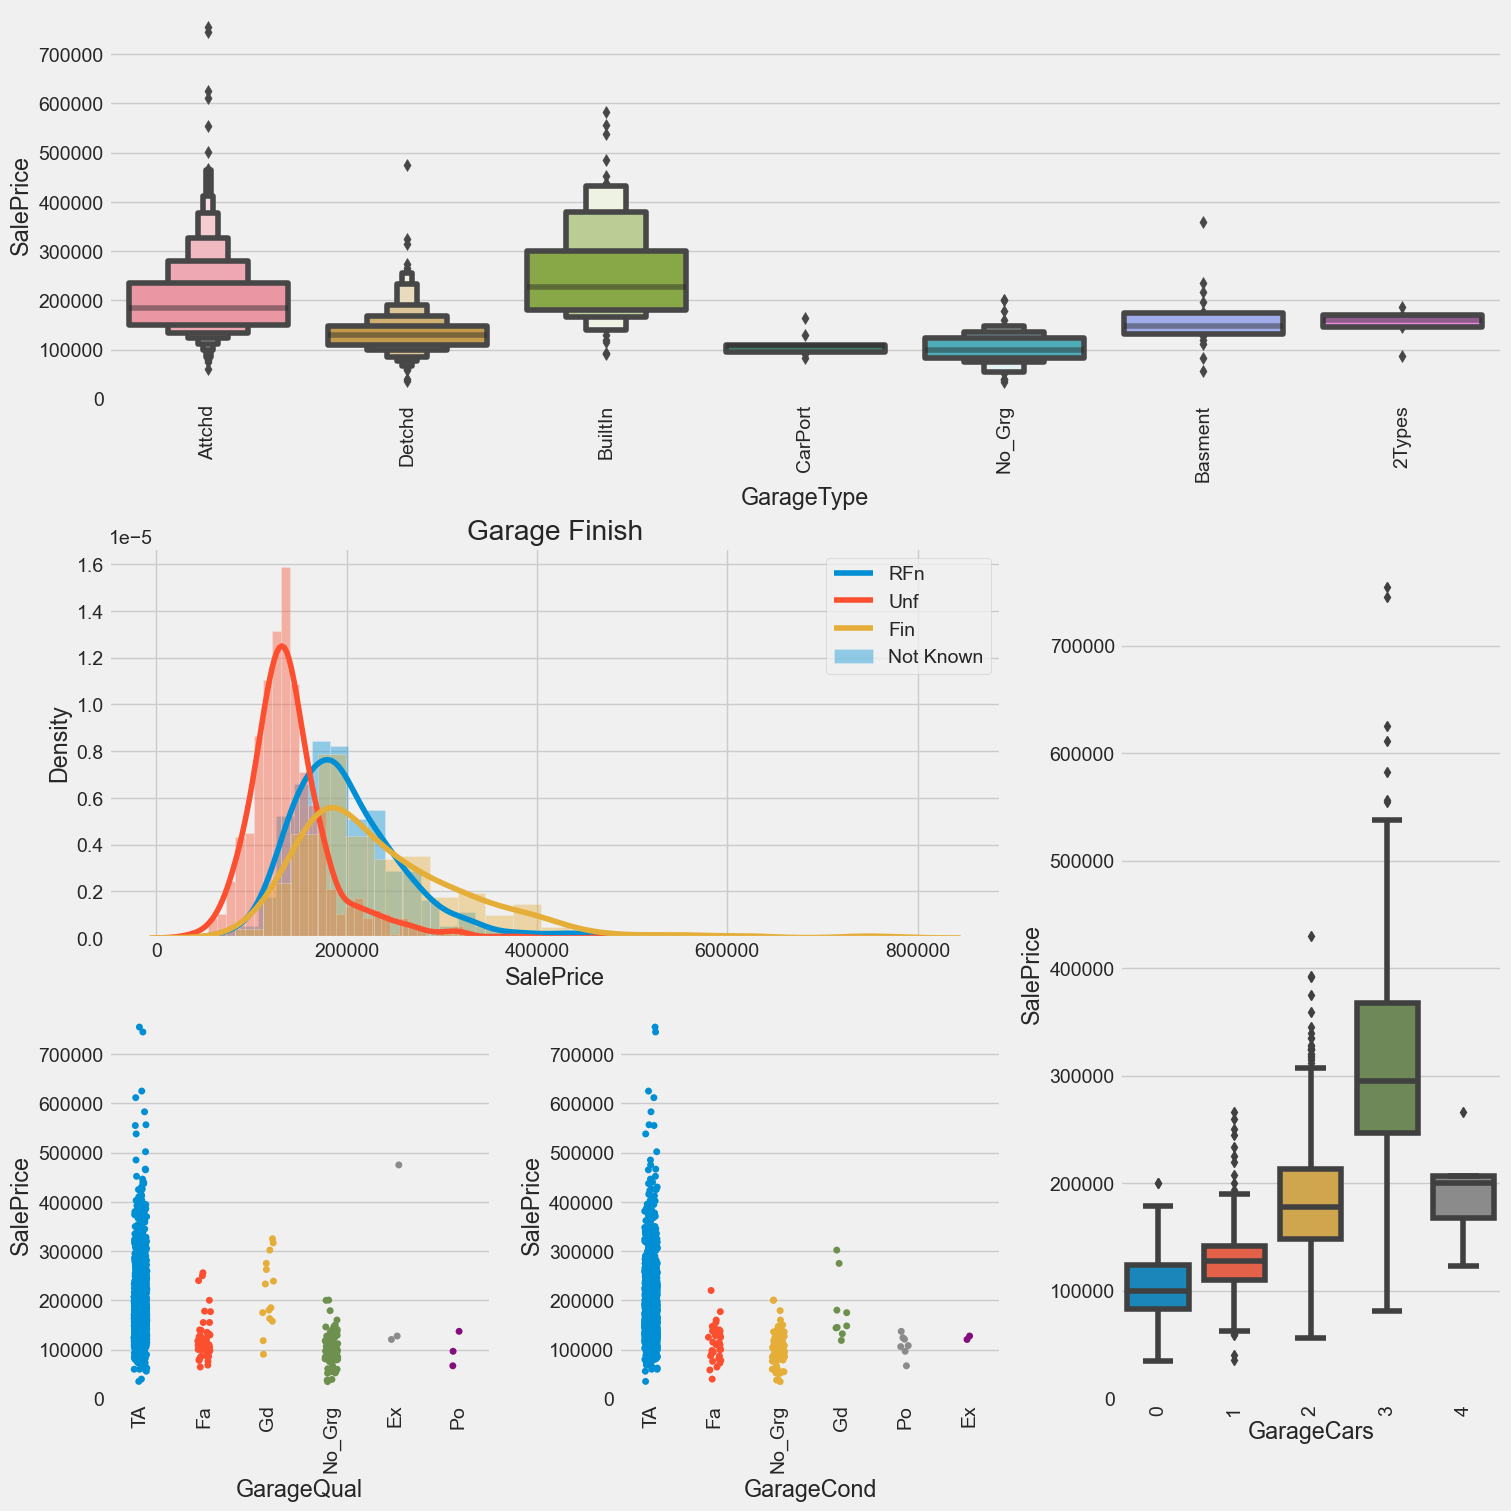

In [98]:
fig = plt.figure(constrained_layout=True,figsize=(15,15))
gs = GridSpec(3, 3, figure=fig)

plt.subplot(gs[0,:])
a1 = sns.boxenplot(data=df,x="GarageType",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:-1])
sns.distplot(df[df['GarageFinish']=='RFn']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Unf']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Fin']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Not Known']['SalePrice'])

plt.legend('upper right' , labels = ['RFn','Unf','Fin','Not Known'])
plt.xlabel("SalePrice")
plt.title("Garage Finish")

plt.subplot(gs[1:,-1])
a1 = sns.boxplot(data=df,x="GarageCars",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,0])
a1 = sns.stripplot(data=df,x="GarageQual",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,-2])
a1 = sns.stripplot(data=df,x="GarageCond",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

In [99]:
px.histogram(df, x="SalePrice", color='PavedDrive',barmode="overlay",title="Paved Driveway")

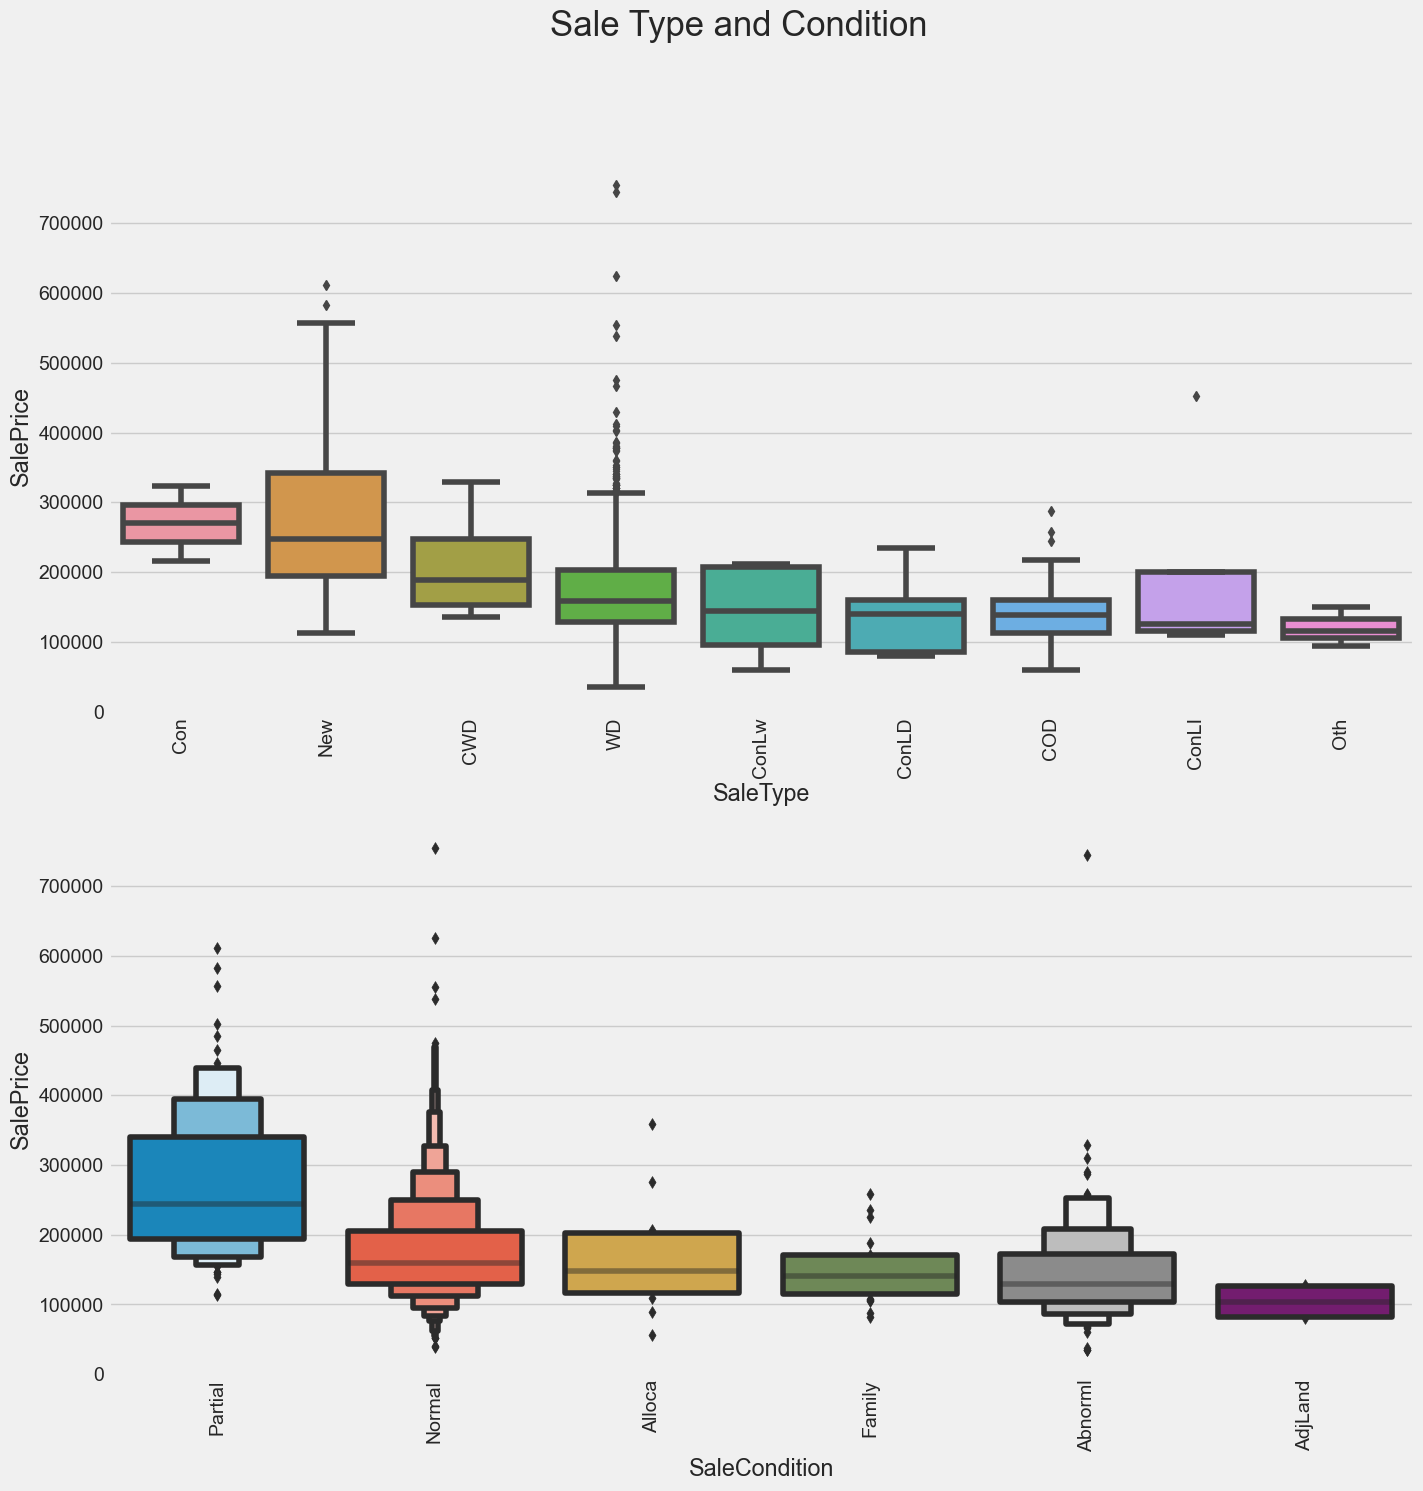

In [100]:
fig = plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
table = df.groupby(['SaleType'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='SaleType',y="SalePrice",order=table['SaleType'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,1,2)
table = df.groupby(['SaleCondition'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='SaleCondition',y="SalePrice",order=table['SaleCondition'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Sale Type and Condition",fontsize=25);

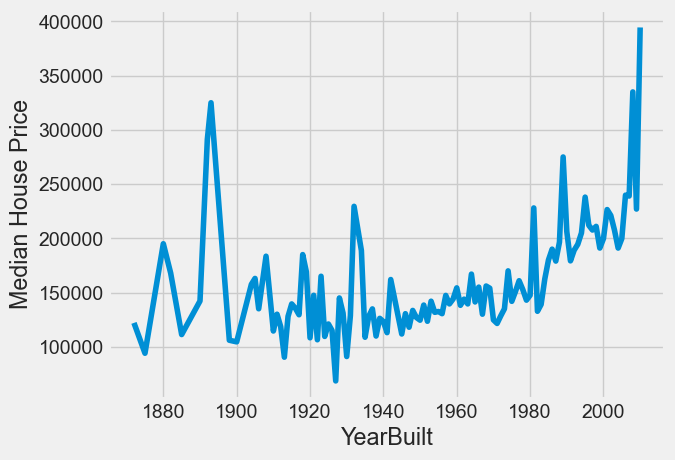

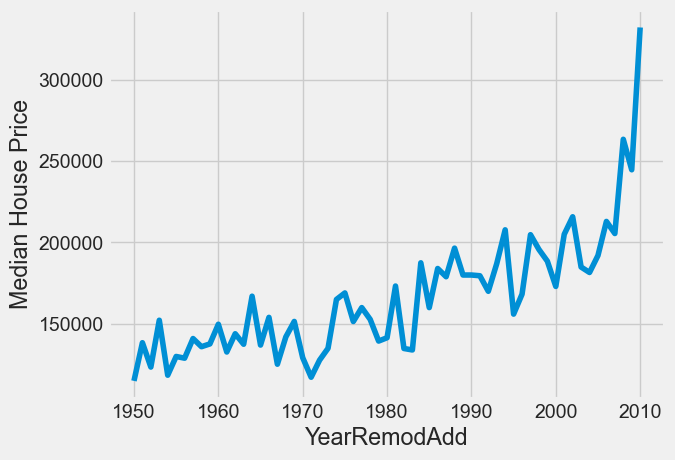

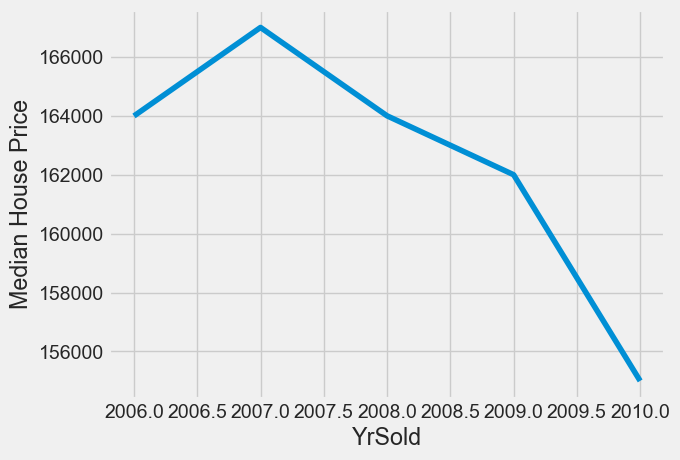

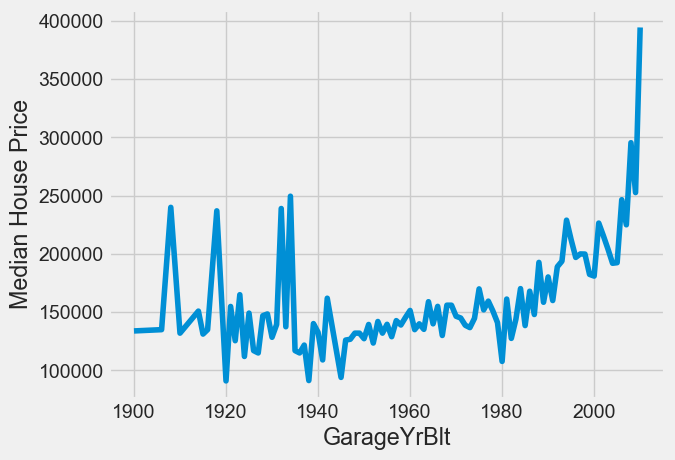

In [101]:
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']
for feature in year_features:
  ax=df.groupby([feature])['SalePrice'].median().plot()
  plt.ylabel("Median House Price")
  plt.show()


In [102]:
data=train.copy()
data['Sold_Built']=data['YrSold']-data['YearBuilt']
fig=px.scatter(data,x='Sold_Built',y='SalePrice',width=700)
fig.show()
data=df.copy()
data['Sold-Remodelled'] = data['YrSold'] - data['YearRemodAdd']
fig=px.scatter(data,x="Sold-Remodelled",y="SalePrice",width=700)
fig.show()

data=df.copy()
data['Sold-GarageBuilt'] = data['YrSold'] - data['GarageYrBlt']
fig=px.scatter(data,x="Sold-GarageBuilt",y="SalePrice",width=700)
fig.show()

In [103]:
dataset=train.copy()

In [104]:
object_to_int = ['MSSubClass','OverallQual','OverallCond','GarageCars']
for feature in object_to_int:
  dataset[feature]=dataset[feature].astype(int)

In [105]:
#Similarly in test
#MSSubClass --> object to int

test['MSSubClass'] = test['MSSubClass'].astype(int)
test['OverallQual'] = test['OverallQual'].astype(int)
test['OverallCond'] = test['OverallCond'].astype(int)

In [106]:
#This step we'll extract the features from the dataset with high skewness for applying log transformation.

datetime=['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']

#Extracting continuous variables from the dataset
continuous=[]
for col in dataset.columns:
    if dataset[col].dtype!='O' and len(dataset[col].unique()) >16 and col not in datetime:
        continuous.append(col)

#Extracting features with skewness more than and less than zero
skewed_features=[]
for col in continuous:
    if dataset[col].skew()>0 or dataset[col].skew()<0:
        skewed_features.append(col)

apply_log=[]
for col in skewed_features:
    if 0 not in dataset[col].unique():
        apply_log.append(col)

#Before log transformation
print("Before Log Transformation........................")
for col in apply_log:
    print("{} --- {}".format(col,dataset[col].skew()))

Before Log Transformation........................
LotFrontage --- 2.4091466665496006
LotArea --- 12.207687851233496
1stFlrSF --- 1.3767566220336365
GrLivArea --- 1.3665603560164552
SalePrice --- 1.8828757597682129


In [107]:
for feature in apply_log:
  dataset[feature]=np.log(data[feature])
  #After log transformation
print("\nAfter Log Transformation.........................")
for col in apply_log:
    print("{} --- {}".format(col,dataset[col].skew()))


After Log Transformation.........................
LotFrontage --- -0.9091148013817885
LotArea --- -0.1379938086958118
1stFlrSF --- 0.07915695223960692
GrLivArea --- -0.006995182187690808
SalePrice --- 0.12133506220520406


c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



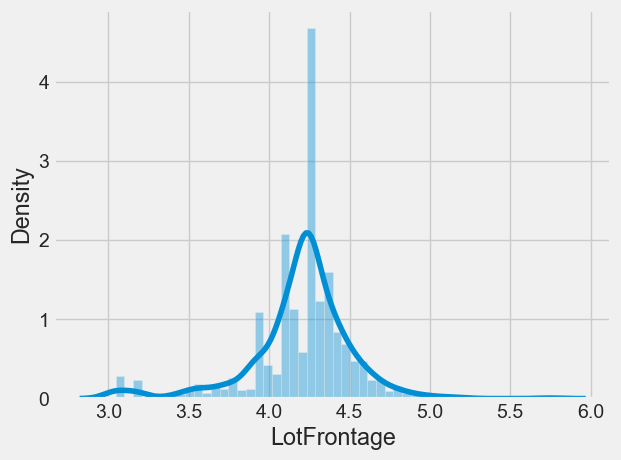

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



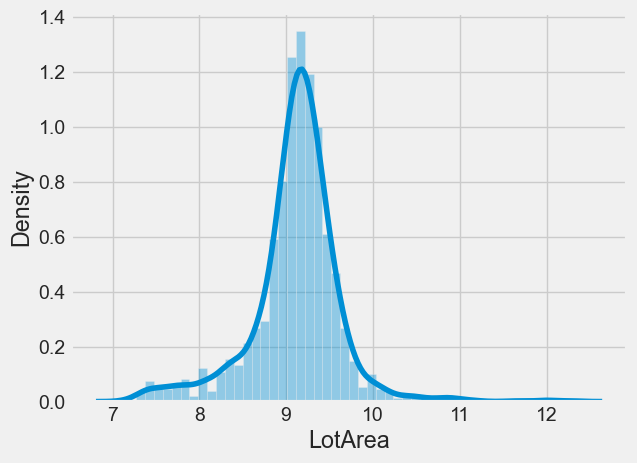

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



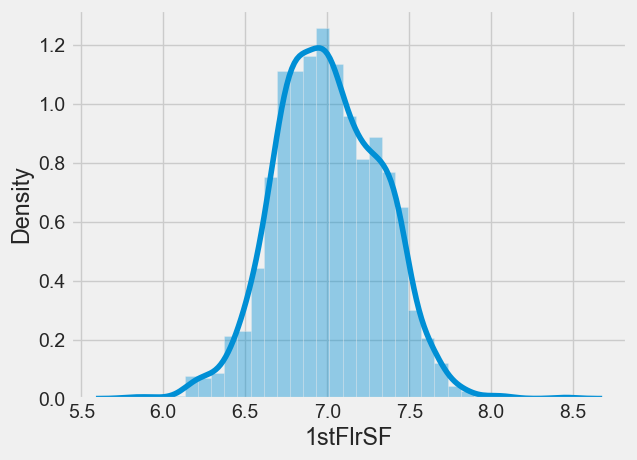

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



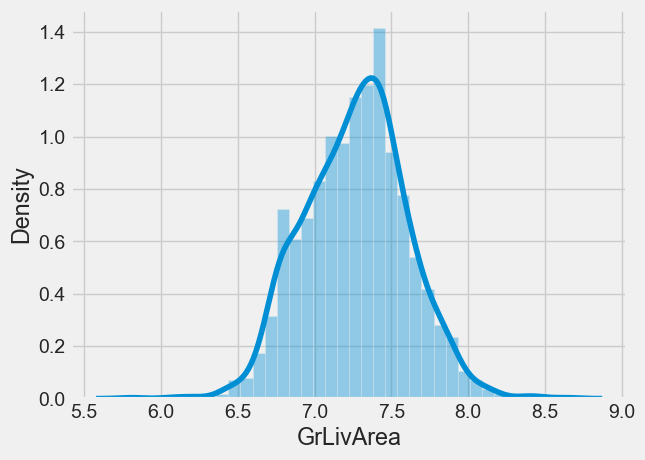

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



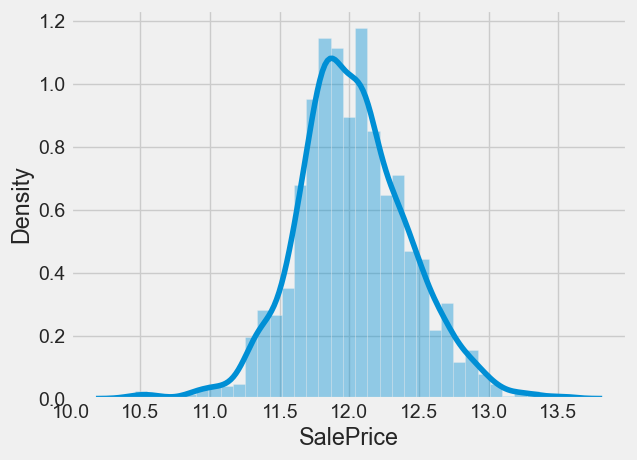

In [108]:


for feature in apply_log:
    fig = sns.distplot(dataset[feature])
    plt.show()

In [109]:
dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,4.127134,8.976768,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,12.072541
1456,20,RL,4.442651,9.486076,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,12.254863
1457,70,RL,4.189655,9.109636,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,12.493130
1458,20,RL,4.219508,9.181632,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,11.864462


In [110]:
categorical =[]
for col in dataset.columns:
  if dataset[col].dtype=='O':
    categorical.append(col)

In [111]:
label_encoders={}
for column in categorical:
  label_encoders[column]=LabelEncoder()
  dataset[column]=label_encoders[column].fit_transform(dataset[column])

In [112]:
##Label Encoding for test dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label_encoders = {}
for column in categorical:
    label_encoders[column] = LabelEncoder()
    test[column] = label_encoders[column].fit_transform(test[column])

In [113]:
dataset[categorical]


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,2,6,5,1,2,5,5,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,3,6,4,1,2,5,5,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,2,6,4,1,2,5,5,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,2,6,2,5,3,5,5,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,2,6,4,1,2,5,5,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,3,6,4,1,2,5,5,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,3,2,4,1,3,5,5,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,2,6,2,1,2,5,5,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,2,6,5,1,3,5,5,2,8,4


In [114]:
test[categorical]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,1,3,3,0,4,0,12,1,2,...,3,6,2,1,3,4,5,2,8,4
1,3,1,0,3,0,0,0,12,2,2,...,2,6,2,1,3,4,5,2,8,4
2,3,1,0,3,0,4,0,8,2,2,...,3,6,4,1,0,4,5,2,8,4
3,3,1,0,3,0,4,0,8,2,2,...,2,6,2,1,0,4,5,2,8,4
4,3,1,0,1,0,4,0,22,2,2,...,2,6,2,1,2,4,5,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1,3,3,0,4,0,10,2,2,...,3,6,2,6,1,2,3,2,8,4
1455,4,1,3,3,0,4,0,10,2,2,...,3,6,2,4,3,4,5,2,8,0
1456,3,1,3,3,0,4,0,11,2,2,...,3,6,4,5,3,4,5,2,8,0
1457,3,1,3,3,0,4,0,11,2,2,...,3,6,2,6,1,2,3,2,8,4


In [115]:
y=dataset['SalePrice']
x=dataset.drop(columns=['SalePrice'],axis=1)
columns_x=x.columns

In [116]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [117]:
x = pd.DataFrame(x,columns=[columns_x])

In [118]:
columns_test = test.columns
scaler=MinMaxScaler()
test=scaler.fit_transform(test)
test = pd.DataFrame(test,columns=[columns_test])

In [119]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=0)

In [120]:
# Using SelectFromModel with lasso for selecting best features.
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_Sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_Sel_model.fit(x_train,y_train)

c:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

c:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [121]:
selected_feat = x_train.columns[(feature_Sel_model.get_support())]

In [122]:
x_train= x_train[selected_feat].reset_index(drop=True)

In [123]:
#Similarly for testing dataset

x_test=x_test[selected_feat]
test=test[selected_feat]

MAE: 0.1023509388769759
MSE: 0.022892933161559197
RMSE: 0.1513041082111097

Accuracy : 0.851836353551546


c:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

c:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



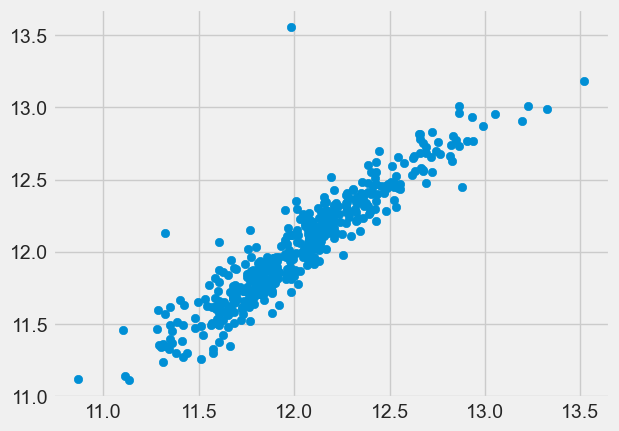

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm = LinearRegression()

#fitting linear model on train dataset
lm.fit(x_train,y_train)
lm_predictions=lm.predict(x_test)

#scatterplot
plt.scatter(y_test,lm_predictions)
#Evaluation
print("MAE:", metrics.mean_absolute_error(y_test, lm_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lm_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predictions)))
print("\nAccuracy : {}".format(lm.score(x_test,y_test)))

In [125]:
lr_reg=lm.predict(test)

c:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



In [126]:
LR_prediction = np.exp(lr_reg)

In [127]:
LR_prediction

array([ 77862.12997782, 103870.34877222, 112210.30714533, ...,
        93609.16750639,  81460.47888977, 150498.06726686])

In [128]:
sample['SalePrice'] = LR_prediction
sample.to_csv('final_submission.csv', index=False)       